<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2021-08-29 13:00:00 (Sunday)</font></h2>
<h3 align="center"><font size="5">Total marks: 2.0</font></h3>

### Your information:
- Fullname: Dam Thi Minh Phuong
- Date of birth:27/05/1990
- Place of birth: HoChiMinhCity
- Email: minhphuong.dam@gmail.com
- Mobile phone:0903222123

In this notebook, we practice all the knowledge and skills that we have learned in this course (LDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of car"** by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
#Chi-square test
from scipy.stats import chi2_contingency, chi2
#ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
         'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
         'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
         'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df= pd.read_csv('imports_85.csv',header=None, names=names)
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#df.tail()

In [7]:
#df.describe(include='all')

### Nhận xét:
- cell chứa mising value '?'
- kiểu dữ liệu chưa đúng => đổi kiểu dữ liệu

In [8]:
# Check duplicate 
print(df.duplicated().sum())

0


In [9]:
# Check duplicate không bao gồm cột 'price'
print(df[df.columns[0:-1]].duplicated().sum())
df.loc[df[df.columns[0:-1]].duplicated()]

7


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
61,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,17950
127,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028


In [10]:
df=df.drop_duplicates(subset=df.columns[0:-1])

In [11]:
#df.info()

In [12]:
df.reset_index(inplace=True,drop=True)

In [13]:
## format lại tên cột:
df.columns = df.columns.str.replace('-','_')

In [14]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## 1. Data exploration & Data visualization

### 1.1 Xác định thuộc tính:
- inputs: tất cả các cột không phải 'price'
- output: price

### 1.2 Xác định Categorical/Continuous Variable

In [15]:
# Continuous Variables
cont_var = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore',
            'stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
# Categorical Variables
cat_var = [x for x in df.columns if x not in cont_var]
cat_var

['symboling',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

### 1.3 Missing values

In [16]:
df.isnull().any()       # ==> không có giá trị null

symboling            False
normalized_losses    False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [17]:
# missing value là '?'
var_missing = []
for var in df:
    if any(df[var] == '?'):
        var_missing.append(var)
var_missing

['normalized_losses',
 'num_of_doors',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [18]:
#Thay thế '?' ở các biến continuous bằng giá trị median của biến đó
for var in ['normalized_losses','bore','stroke','horsepower','peak_rpm','price']:
    median = df[var].loc[df[var] != '?'].astype(float).median()
    df[var] = df[var].replace('?', median).astype(float)
    

In [19]:
#Thay thế '?' ở biến categorical - 'num_of_doors' bằng mode của biến đó
mode = df['num_of_doors'].loc[df['num_of_doors'] != '?'].mode()[0]
df['num_of_doors'] = df['num_of_doors'].replace('?', mode)

In [20]:
#df.info()

### 1.4 Phân tích đơn biến

#### 1.4.a) Phân tích đơn biến Continuous 

In [21]:
#Phân tích Xu hướng trung tâm 
df[cont_var].describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,198.0,119.757576,32.166790,65.00,98.750,113.00,136.25,256.00
wheel_base,198.0,98.851010,5.997324,86.60,94.500,97.00,102.40,120.90
length,198.0,174.110101,12.443081,141.10,166.300,173.20,183.40,208.10
width,198.0,65.914646,2.164888,60.30,64.025,65.50,66.90,72.30
height,198.0,53.773232,2.416135,47.80,52.000,54.10,55.50,59.80
curb_weight,198.0,2556.419192,525.388463,1488.00,2145.000,2417.00,2947.75,4066.00
engine_size,198.0,126.949495,41.785620,61.00,97.250,115.00,141.00,326.00
bore,198.0,3.326010,0.271313,2.54,3.150,3.31,3.58,3.94
stroke,198.0,3.258081,0.314617,2.07,3.110,3.29,3.41,4.17
compression_ratio,198.0,10.119798,3.962363,7.00,8.500,9.00,9.40,23.00


In [22]:
#Phân tích Xu hướng trung tâm và sự lây lan của biến continuous
def single_var_anal(var,df):
    mean = df[var].mean()
    median = df[var].median() 
    mode = df[var].mode()
    max_val = df[var].max()
    min_val = df[var].min()
    range_val = np.ptp(df[var])
    variance = df[var].var()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()
    result = [mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis]
    return result

In [23]:
result_list=[]
for var in cont_var:
    result = single_var_anal(var,df)
    result_list.append(result)
df_result = pd.DataFrame(result_list,columns=['mean','median','mode','max_val','min_val','range_val','variance','skewness','kurtosis'],
                  index=cont_var)
df_result

,mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis
normalized_losses,119.757576,113.00,0 113.0 dtype: float64,256.00,65.00,191.0,1.034702e+03,1.037975,1.543562
wheel_base,98.851010,97.00,0 94.5 dtype: float64,120.90,86.60,34.3,3.596789e+01,1.083197,1.057854
length,174.110101,173.20,0 157.3 dtype: float64,208.10,141.10,67.0,1.548303e+02,0.150577,-0.105613
width,65.914646,65.50,0 63.8 dtype: float64,72.30,60.30,12.0,4.686739e+00,0.901631,0.670657
height,53.773232,54.10,0 50.8 dtype: float64,59.80,47.80,12.0,5.837706e+00,0.078895,-0.400893
curb_weight,2556.419192,2417.00,0 1918 1 2275 2 2385 dtype: int64,4066.00,1488.00,2578.0,2.760330e+05,0.676805,-0.072599
engine_size,126.949495,115.00,0 92 dtype: int64,326.00,61.00,265.0,1.746038e+03,1.988036,5.427156
bore,3.326010,3.31,0 3.62 dtype: float64,3.94,2.54,1.4,7.361090e-02,0.042987,-0.780920
stroke,3.258081,3.29,0 3.4 dtype: float64,4.17,2.07,2.1,9.898412e-02,-0.698280,2.247714
compression_ratio,10.119798,9.00,0 9.0 dtype: float64,23.00,7.00,16.0,1.570032e+01,2.637148,5.384938


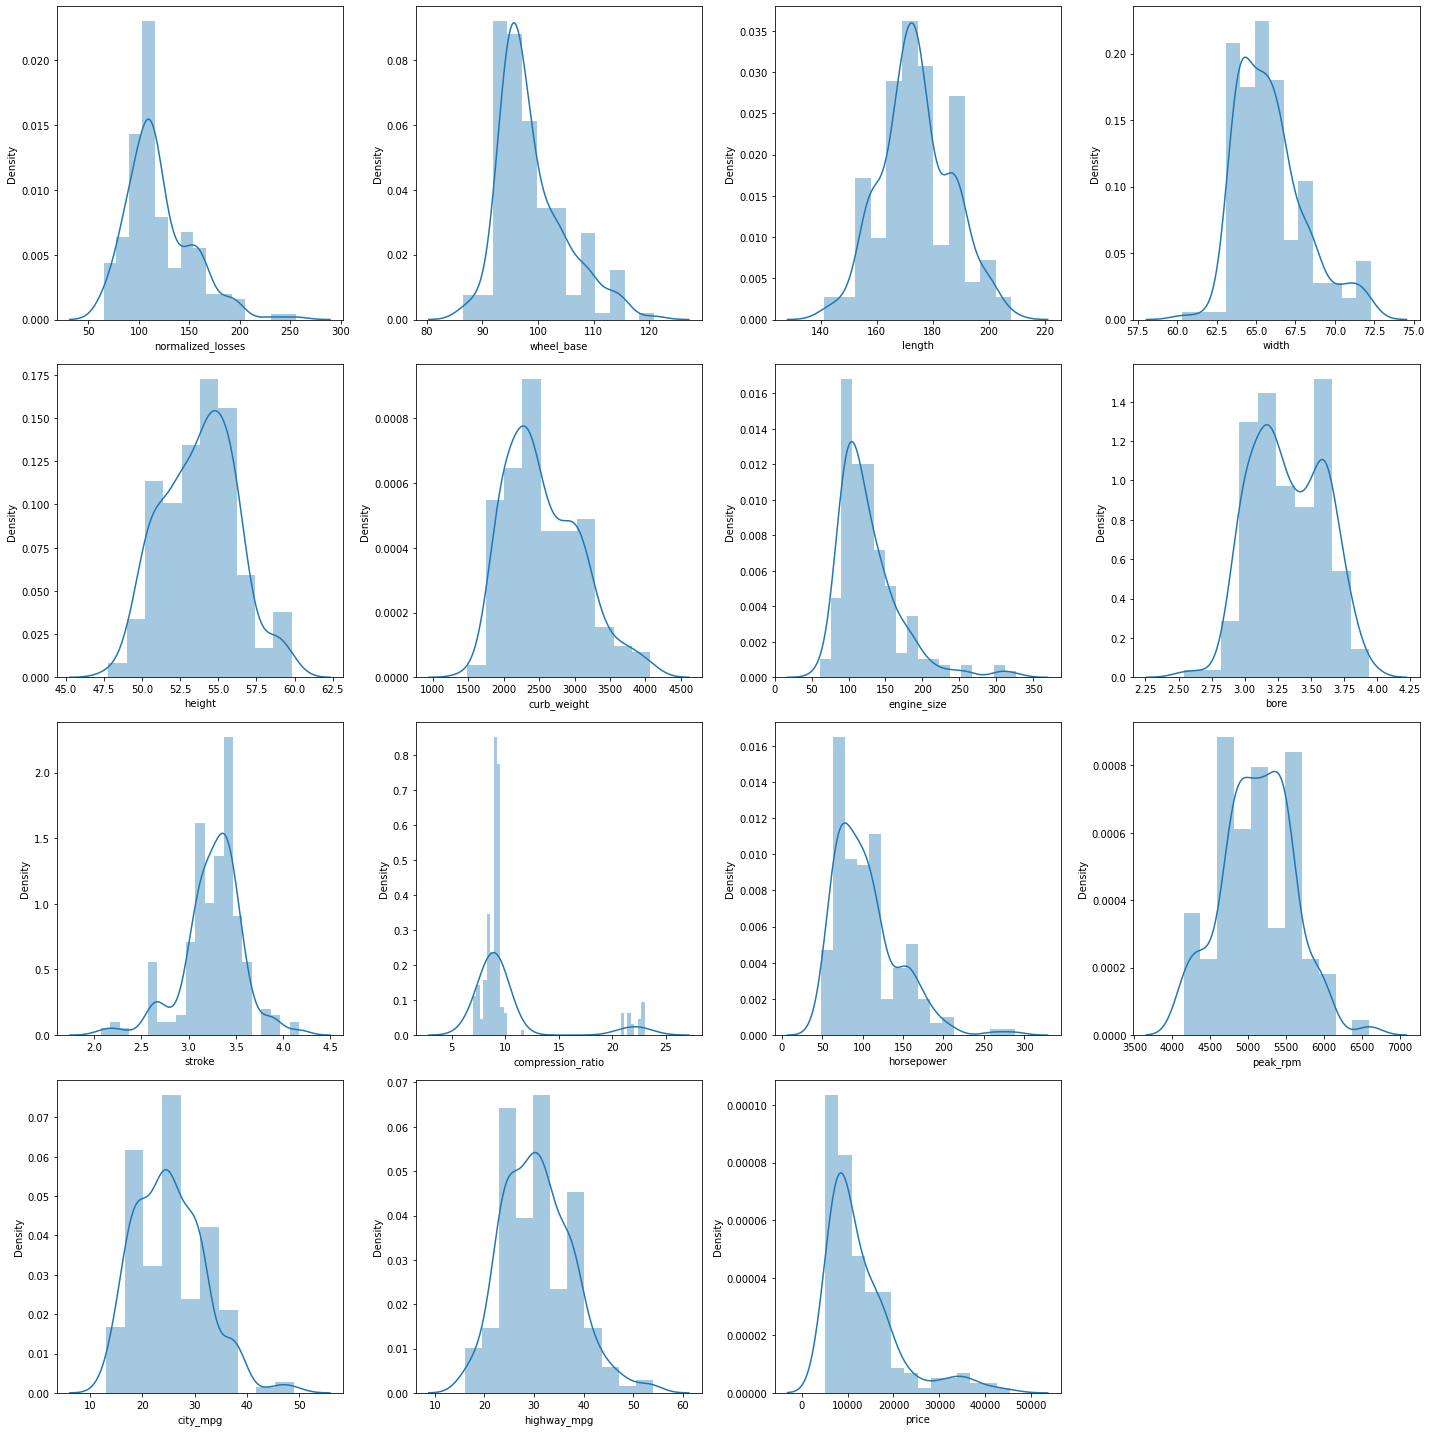

In [24]:
#Visualization - Histogram
plt.figure(figsize=(20,20))
for i in range(1,len(cont_var)+1):
    plt.subplot(4,4,i)
    sns.distplot(df[cont_var[i-1]].dropna())
plt.tight_layout()
plt.show()

### Nhận xét:
- 'stroke' có phân phối lệch trái
- 'height' và 'bore' có phân phối xấp xỉ chuẩn (skew ~0) nhưng kurtosis !=0 
- các biến còn lại có phân phối lệch phải

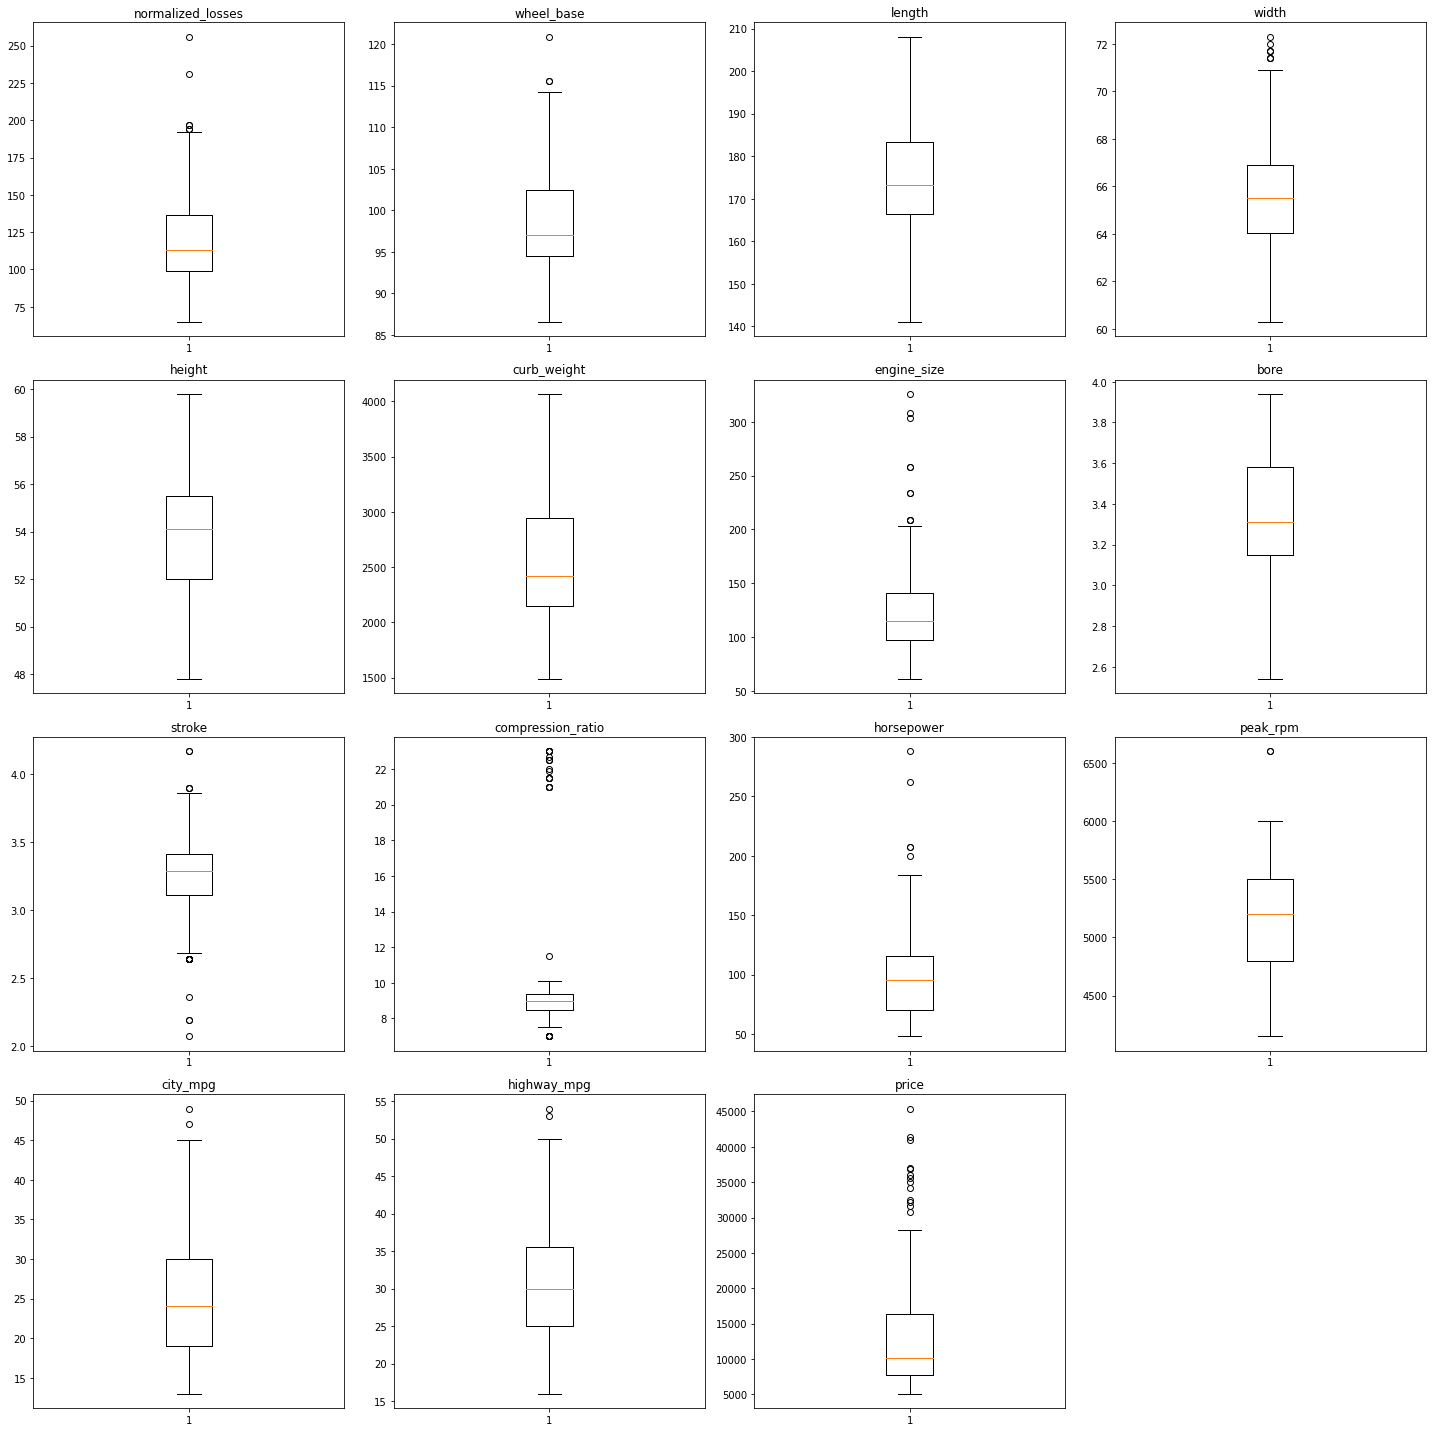

In [25]:
#Visualization - Boxplot
plt.figure(figsize=(20,20))
for i in range (1,len(cont_var)+1):
    plt.subplot(4,4,i)
    plt.boxplot(df[cont_var[i-1]].dropna())
    plt.title(cont_var[i-1])
plt.tight_layout()
plt.show()

### Nhận xét:
- Ngoại trừ các biến: 'length','height','curb_weight','bore' các biến còn lại đều có outliers. Cần xem xét xem có cần loại bỏ những outliers này không.

#### 1.4.b) Phân tích đơn biến Categorical 

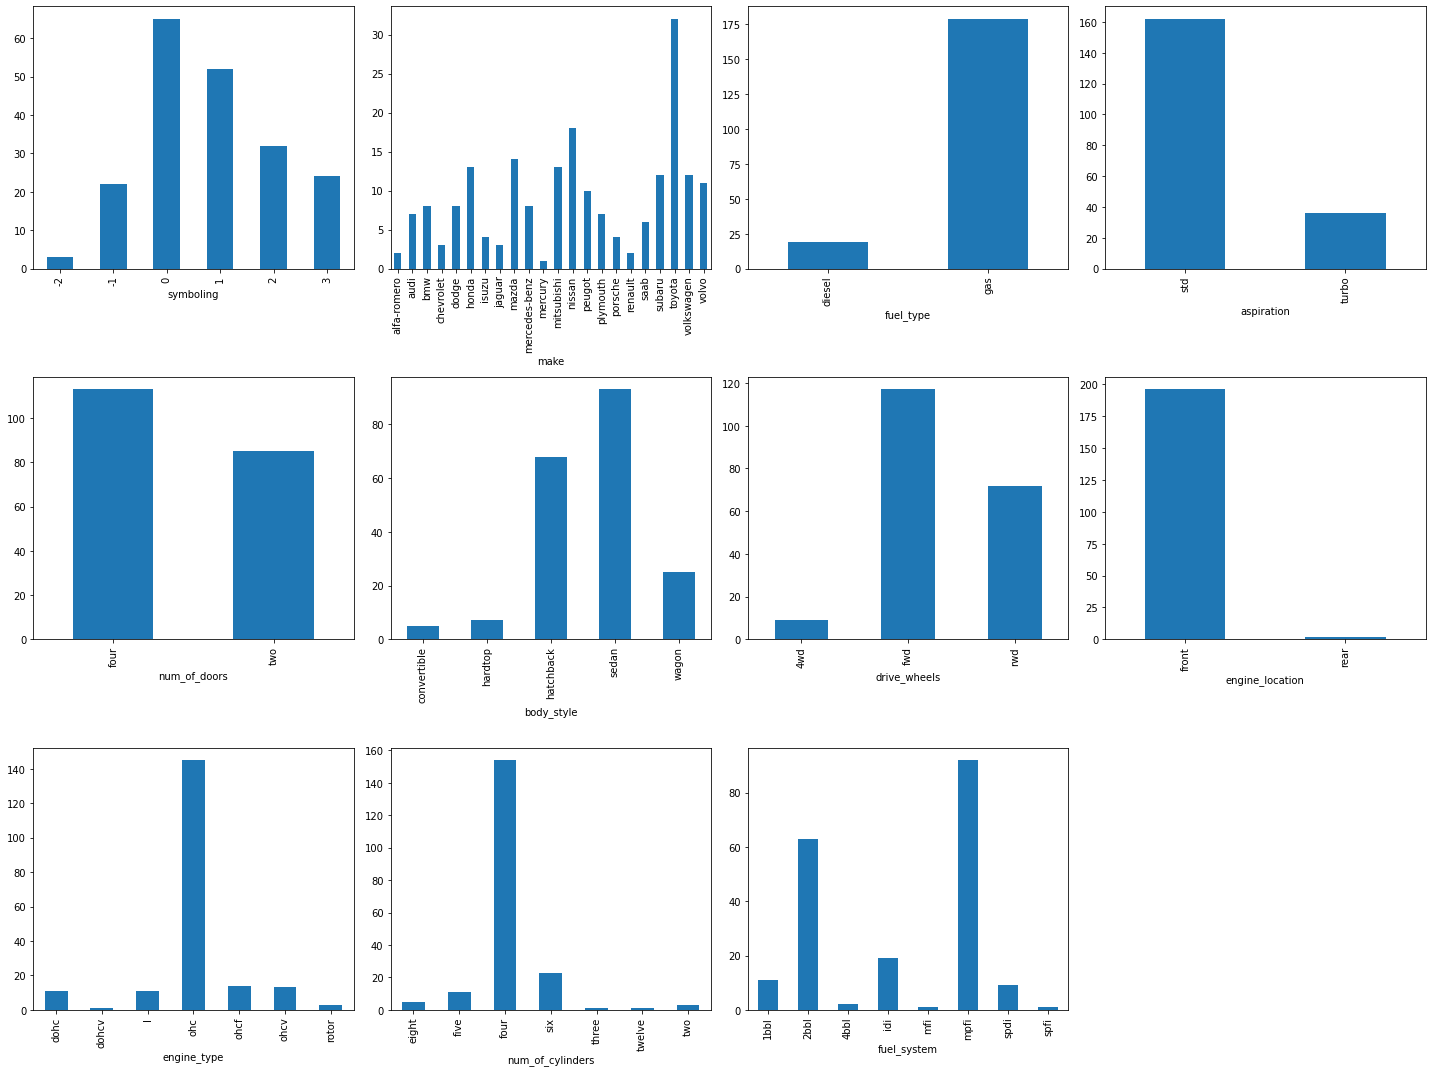

In [26]:
plt.figure(figsize=(20,15))
for i in range (1,len(cat_var)+1):
    count = df.groupby(df[cat_var[i-1]].dropna()).size()
    #print(count)
    plt.subplot(3,4,i)
    count.plot.bar()
plt.tight_layout()
plt.show()

### Nhận xét:
- Các biến đều có sự khác biệt ở các phân loại

### 1.5 Phân tích 2 biến
- input - input: cont-cont,cat-cat,cont-cat. 
- input - output(cont): cont-cont,cat-cont. 

#### 1.5.a) Phân tích 2 biến input-output(price - continuous variable)
- continuous - price 
- categorical - price 

In [27]:
# continuous - price 
def two_cont_vars(cont_var1,cont_var2,df,correlation_list):
    corr=df[cont_var1].corr(df[cont_var2])
    if abs(corr) > 0 and  abs(corr)<0.3:
        result = '==> Không có Tương quan'
    elif abs(corr) > 0.3 and  abs(corr)<0.6:
        result = '==> Tương quan yếu'
        correlation_list.append(cont_var1)
    else:
        result = '==> Tương quan mạnh'
        correlation_list.append(cont_var1)
#     print('='*50)
#     print('Correlation of',cont_var1,'&',cont_var2,':',corr)
#     print(result)

In [28]:
corr_cont_list=[]
for i in range(0,len(cont_var)):
    two_cont_vars(cont_var[i],'price',df,corr_cont_list)
    i+=1
print('Những biến có tương quan với "price":\n',corr_cont_list)

Những biến có tương quan với "price":
 ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg', 'price']


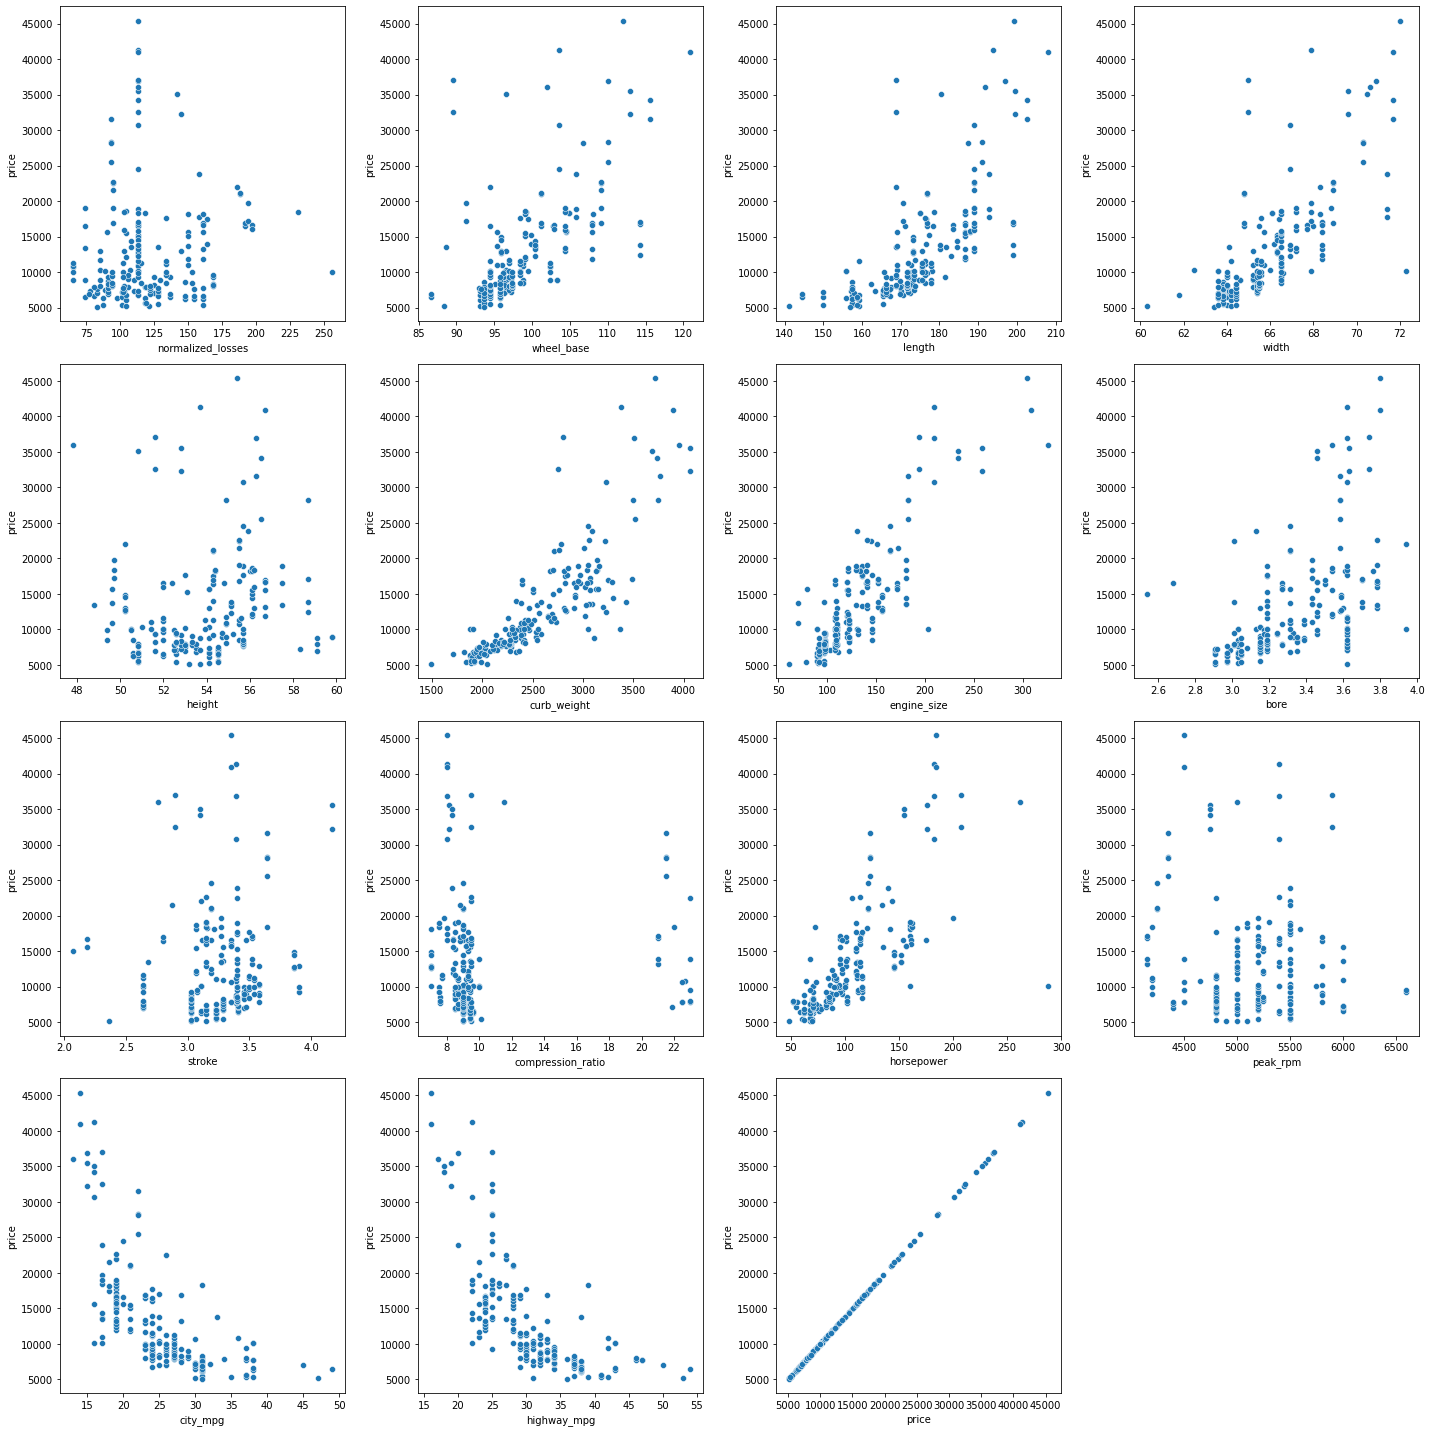

In [29]:
plt.figure(figsize=(20,20))
for i in range (1,len(cont_var)+1):
    plt.subplot(4,4,i)
    sns.scatterplot(x=df[cont_var[i-1]],y=df['price'])
plt.tight_layout()
plt.show()

### Nhận xét: 
Từ biểu đồ phân phối ta thấy các biến sau có tương quan với 'price': 
- ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg', 'price']

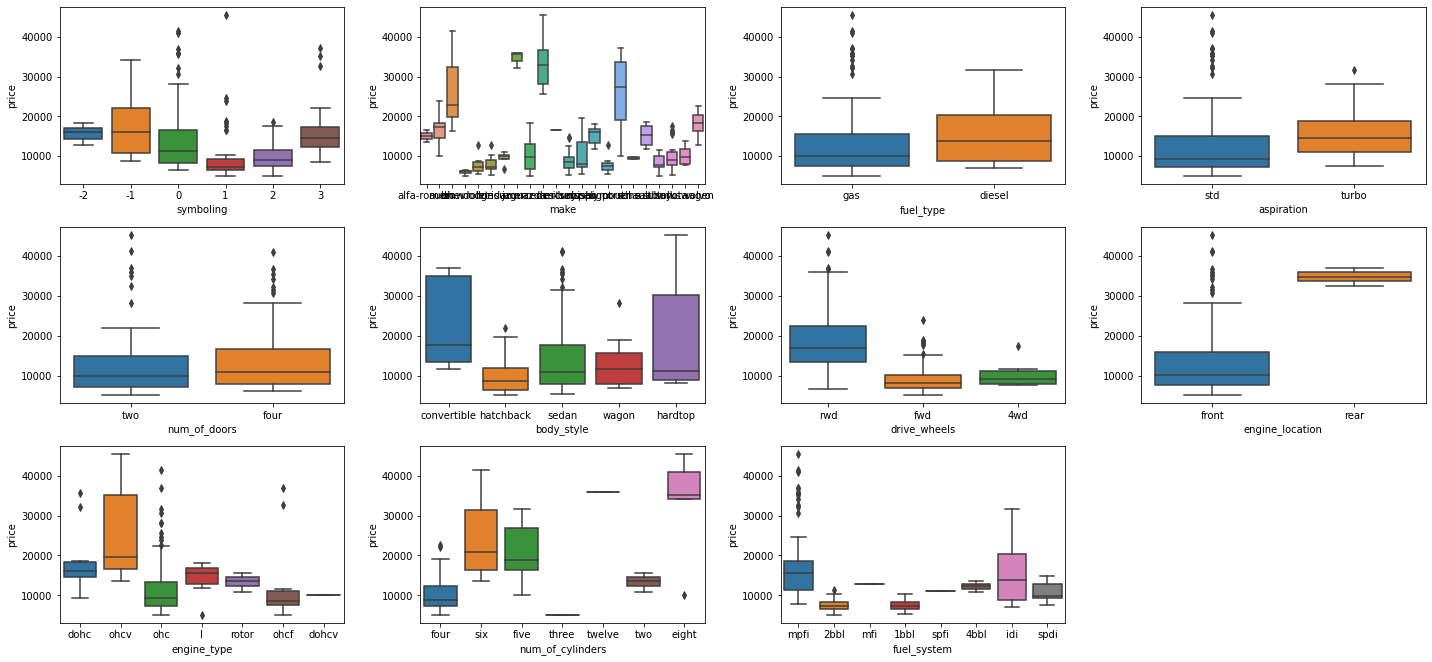

In [30]:
# categorical - price 
plt.figure(figsize=(20,18))
for i in range(1,len(cat_var)+1):
    df_melt = df[[cat_var[i-1],'price']]
    plt.subplot(6,4,i)
    sns.boxplot(data=df_melt,x=cat_var[i-1],y='price' )
    i+=1
plt.tight_layout()
plt.show()

### Nhận xét:
- Từ boxplot có thể thấy rằng ngoại trừ 'fuel_type','aspiration','num_of_doors' các biến phân loại khác đều ảnh hưởng tới giá 

In [31]:
#Anova Test -> tìm ra biến phân loại phụ thuộc với price
dependent_cat_list = []
for var in cat_var:
    model = ols('price ~ C(' + var + ')', df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    #display(anova_table)
    if anova_table['PR(>F)'][0] < 0.05:
        #print(var,'p-value:',anova_table['PR(>F)'][0])
        #print('==> Dependent (Reject H0)')
        dependent_cat_list.append(var)
print(dependent_cat_list)

['symboling', 'make', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


In [32]:
#dependent_cat_list

In [33]:
#corr_cont_list

#### 1.5.b) Phân tích các cặp biến input: 
- Continuous variable trong corr_cont_list 
- Categorical variable trong dependent_cat_list  

In [34]:
#Continuous variable trong corr_cont_list
temp_cont_list = corr_cont_list
corr = df[corr_cont_list].corr()
corr

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg,price
wheel_base,1.000000,0.879841,0.795346,0.787027,0.590734,0.508207,0.387696,-0.504728,-0.573321,0.626728
length,0.879841,1.000000,0.839435,0.879899,0.691172,0.609612,0.572086,-0.687792,-0.717537,0.706844
width,0.795346,0.839435,1.000000,0.870047,0.747576,0.563178,0.664632,-0.659937,-0.690730,0.747025
curb_weight,0.787027,0.879899,0.870047,1.000000,0.855289,0.646010,0.762838,-0.769993,-0.807568,0.829691
engine_size,0.590734,0.691172,0.747576,0.855289,1.000000,0.580508,0.812827,-0.665888,-0.689951,0.862351
bore,0.508207,0.609612,0.563178,0.646010,0.580508,1.000000,0.571542,-0.585010,-0.588107,0.522823
horsepower,0.387696,0.572086,0.664632,0.762838,0.812827,0.571542,1.000000,-0.806346,-0.776539,0.740912
city_mpg,-0.504728,-0.687792,-0.659937,-0.769993,-0.665888,-0.585010,-0.806346,1.000000,0.971394,-0.671250
highway_mpg,-0.573321,-0.717537,-0.690730,-0.807568,-0.689951,-0.588107,-0.776539,0.971394,1.000000,-0.699212
price,0.626728,0.706844,0.747025,0.829691,0.862351,0.522823,0.740912,-0.671250,-0.699212,1.000000


In [35]:
corr[abs(corr)>=0.8]

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg,price
wheel_base,1.000000,0.879841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length,0.879841,1.000000,0.839435,0.879899,NaN,NaN,NaN,NaN,NaN,NaN
width,NaN,0.839435,1.000000,0.870047,NaN,NaN,NaN,NaN,NaN,NaN
curb_weight,NaN,0.879899,0.870047,1.000000,0.855289,NaN,NaN,NaN,-0.807568,0.829691
engine_size,NaN,NaN,NaN,0.855289,1.000000,NaN,0.812827,NaN,NaN,0.862351
bore,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
horsepower,NaN,NaN,NaN,NaN,0.812827,NaN,1.000000,-0.806346,NaN,NaN
city_mpg,NaN,NaN,NaN,NaN,NaN,NaN,-0.806346,1.000000,0.971394,NaN
highway_mpg,NaN,NaN,NaN,-0.807568,NaN,NaN,NaN,0.971394,1.000000,NaN
price,NaN,NaN,NaN,0.829691,0.862351,NaN,NaN,NaN,NaN,1.000000


### Nhận xét:
- Các cặp biến sau có mức tương quan >=0.8 => Cần xem xét loại bỏ / gộp các thuộc tính này lại 

'length' và 'wheel_base'  
'length' và 'width'  
'length' và 'curb_weight'  
'width'  và 'curb_weight' 

=> các thuộc tính về kích thước và trọng lượng của xe, loại bỏ biến 'wheel_base' vì tương đồng với 'length' ('length' tương quan với 'price' hơn)

'engine_size' và 'curb_weight'  
'engine_size' và 'horsepower'  
'horsepower'  và 'city_mpg'
'highway_mpg' và 'city_mpg' (~ 1)  => chọn 'highway_mpg' vì có corr với 'price' cao hơn

===> SELECT: 'length','width','curb_weight','engine_size','horsepower','highway_mpg','price'

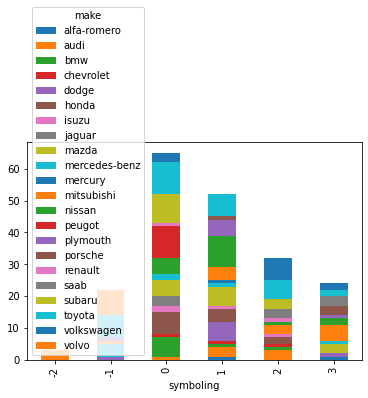

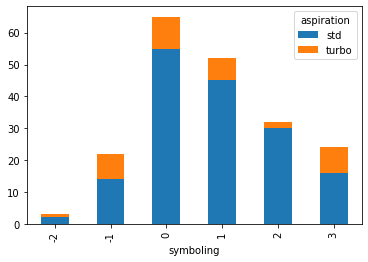

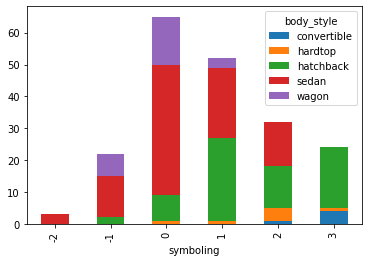

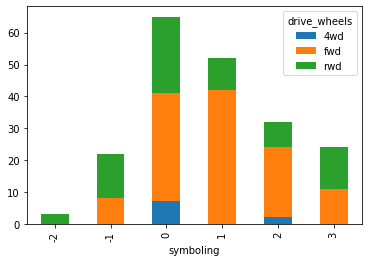

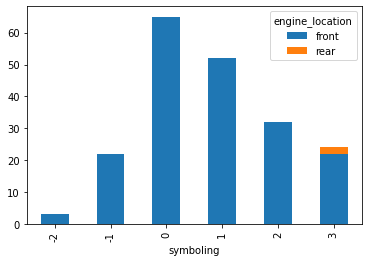

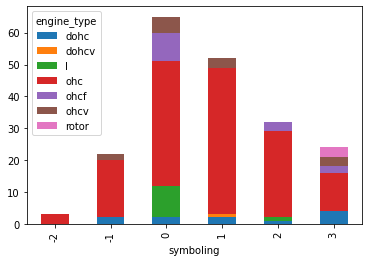

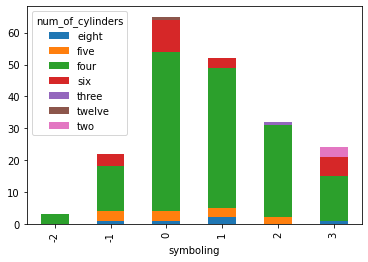

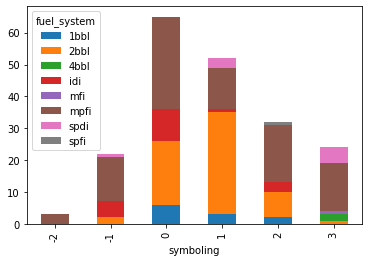

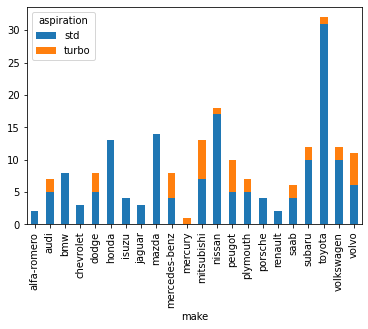

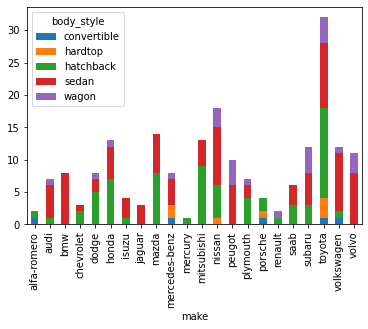

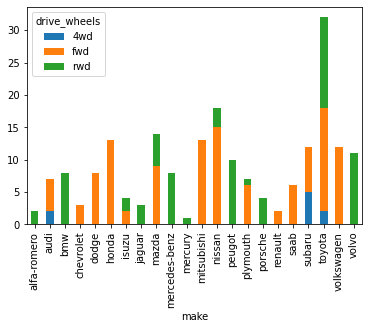

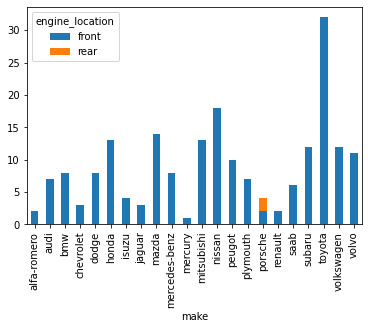

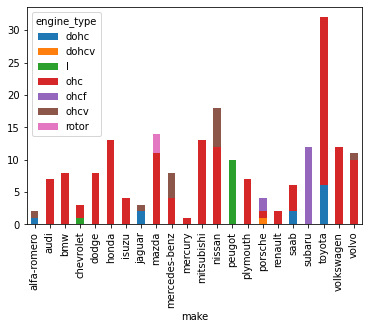

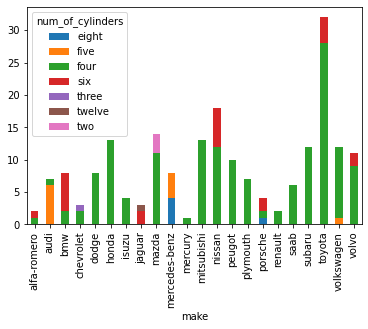

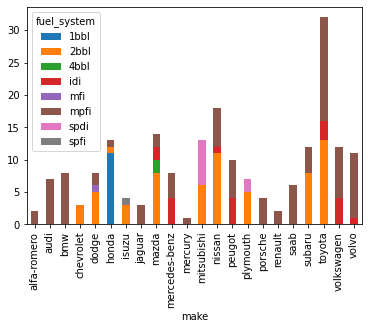

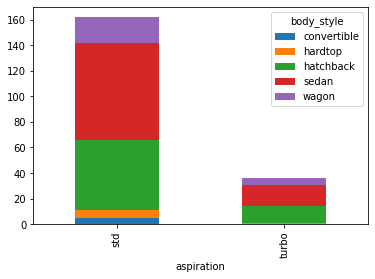

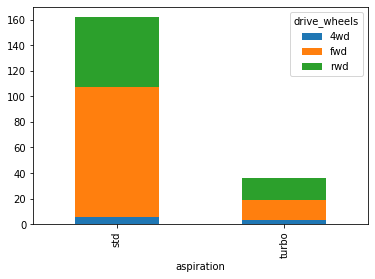

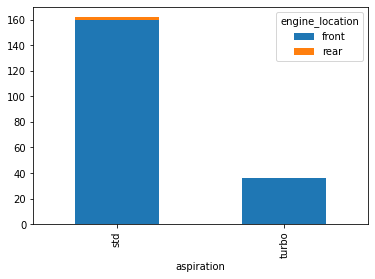

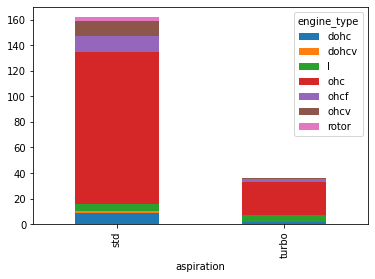

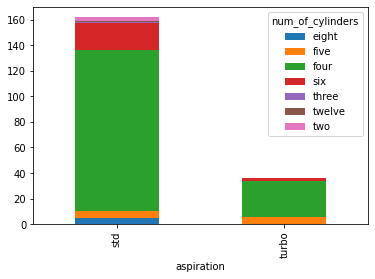

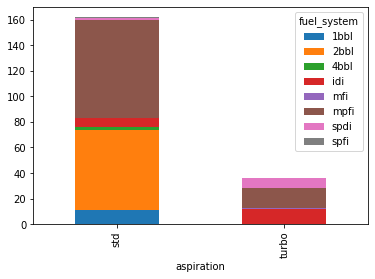

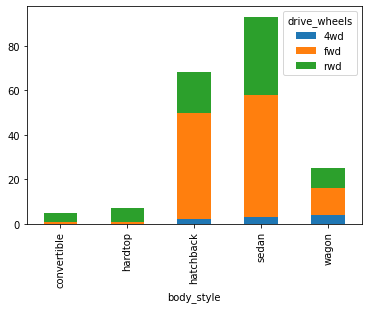

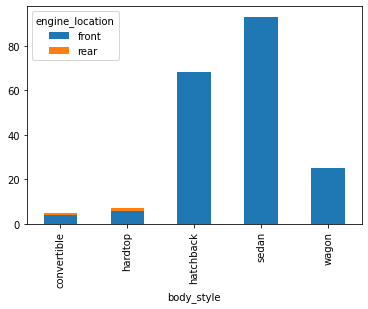

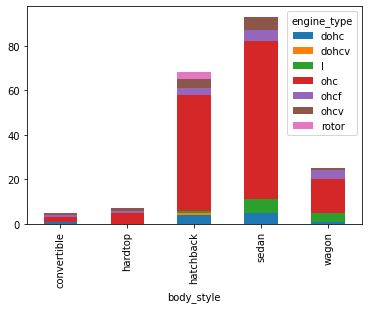

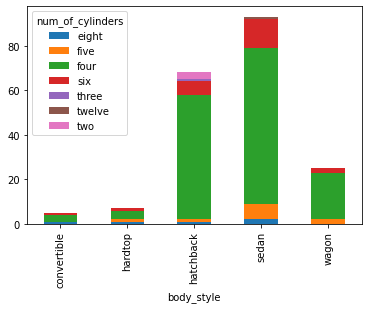

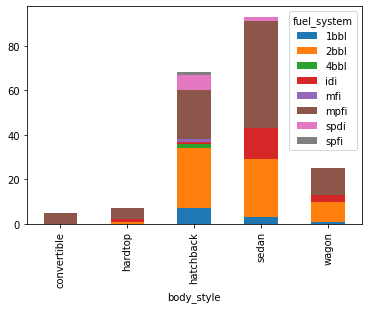

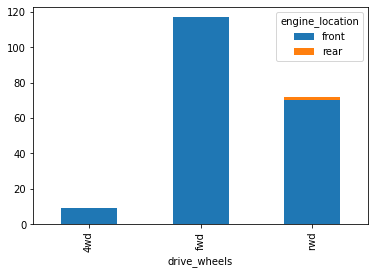

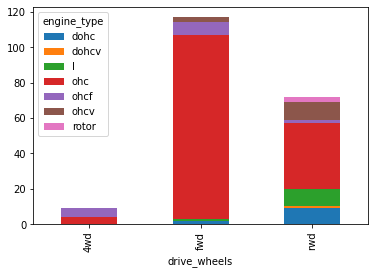

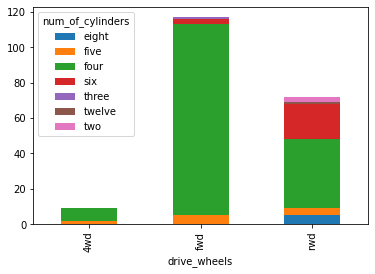

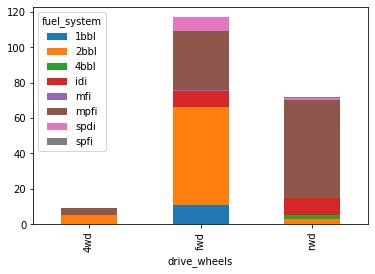

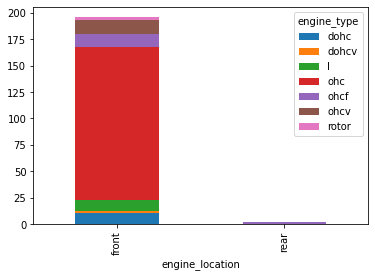

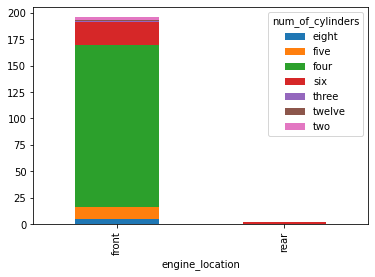

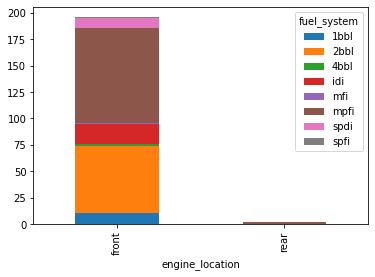

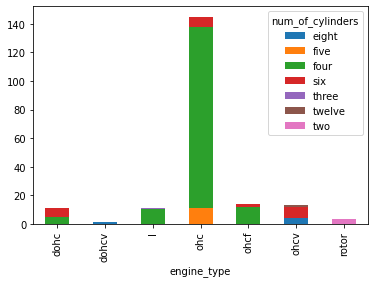

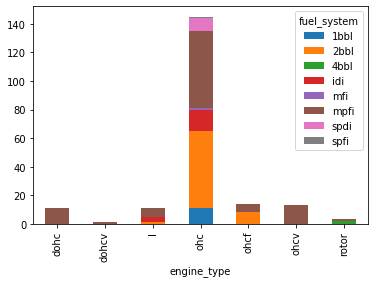

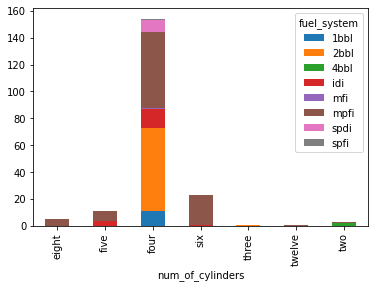

In [36]:
#Categorical variable trong dependent_cat_list
# Stacked bar plot:
for i in range (len(dependent_cat_list)):
    for j in range(i+1,len(dependent_cat_list)):
        table = pd.crosstab(df[dependent_cat_list[i]],df[dependent_cat_list[j]])
        table.plot(kind = 'bar', stacked = True)
    i+=1        

In [37]:
#Chi-square Test: H0 - Independent
chi2_test_df=pd.DataFrame(index=dependent_cat_list,columns=dependent_cat_list)
#chi2_test_df

In [38]:
alpha = 0.05
for i in range (len(dependent_cat_list)):
    for j in range(i+1,len(dependent_cat_list)):
        table = pd.crosstab(df[dependent_cat_list[i]],df[dependent_cat_list[j]])
        stat, p, dof, expected = chi2_contingency(table)
        #print('\n*** significance = %.3f, p_value = %.3f' %(alpha,p))
        if p < alpha:
            #print(dependent_cat_list[i],'&',dependent_cat_list[j],'==> Dependent (Reject H0)')
            chi2_test_df.loc[dependent_cat_list[i],dependent_cat_list[j]]='Dependent'
        else:
            #print(dependent_cat_list[i],'&',dependent_cat_list[j],'==> Independent (Fail to Reject H0)')
            chi2_test_df.loc[dependent_cat_list[i],dependent_cat_list[j]]='Independent'
chi2_test_df

,symboling,make,aspiration,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
symboling,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
make,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
aspiration,NaN,NaN,NaN,Independent,Independent,Independent,Independent,Dependent,Dependent
body_style,NaN,NaN,NaN,NaN,Dependent,Dependent,Independent,Independent,Independent
drive_wheels,NaN,NaN,NaN,NaN,NaN,Independent,Dependent,Dependent,Dependent
engine_location,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Independent
engine_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent
num_of_cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent
fuel_system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nhận xét:
- 'Symboling' phụ thuộc với tất cả các biến còn lại => loại bỏ

==> SELECT: 'make','aspiration','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system'

In [39]:
selected_cont_var = ['length','width','curb_weight','engine_size','horsepower','highway_mpg','price']
selected_cat_var = ['make','aspiration','body_style','drive_wheels','engine_location','engine_type'
                    ,'num_of_cylinders','fuel_system']

In [40]:
selected_var=selected_cont_var + selected_cat_var
len(selected_var)

15

In [41]:
df_new= df[selected_var]
df_new.head()

,length,width,curb_weight,engine_size,horsepower,highway_mpg,price,make,aspiration,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,168.8,64.1,2548,130,111.0,27,13495.0,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi
1,171.2,65.5,2823,152,154.0,26,16500.0,alfa-romero,std,hatchback,rwd,front,ohcv,six,mpfi
2,176.6,66.2,2337,109,102.0,30,13950.0,audi,std,sedan,fwd,front,ohc,four,mpfi
3,176.6,66.4,2824,136,115.0,22,17450.0,audi,std,sedan,4wd,front,ohc,five,mpfi
4,177.3,66.3,2507,136,110.0,25,15250.0,audi,std,sedan,fwd,front,ohc,five,mpfi


### 1.6 Outliers

In [42]:
def number_of_outliers(cont_var,df,df_outliers):
    upper_outliers = len(df[cont_var][df[cont_var] > (np.quantile(df[cont_var],0.75) + 1.5*scipy.stats.iqr(df[cont_var]))])
    lower_outliers = len(df[cont_var][df[cont_var] < (np.quantile(df[cont_var],0.25) - 1.5*scipy.stats.iqr(df[cont_var]))])
    outlier_per = (upper_outliers + lower_outliers)/len(df[cont_var])
    df_outliers.loc[cont_var,'upper_outliers']=upper_outliers
    df_outliers.loc[cont_var,'lower_outliers']=lower_outliers
    df_outliers.loc[cont_var,'outlier_per']=round(outlier_per,2)*100

In [43]:
df_outliers = pd.DataFrame(index=selected_cont_var, columns=['upper_outliers','lower_outliers','outlier_per'])

In [44]:
for var in selected_cont_var:
    number_of_outliers(var,df_new,df_outliers)
df_outliers

,upper_outliers,lower_outliers,outlier_per
length,0,0,0
width,8,0,4
curb_weight,0,0,0
engine_size,10,0,5
horsepower,5,0,3
highway_mpg,2,0,1
price,13,0,7


### Nhận xét:
- số lượng và % outliers khá lớn => nếu loại bỏ outliers thì sẽ mất rất nhiều dữ liệu => không loại bỏ

## 2. Encode biến categorical

In [45]:
df_new['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [46]:
n_cyl_dict = {'four':4, 'six':6, 'five':5, 'three':3, 'two':2, 'twelve':12, 'eight':8}
df_new['n_cyl_encode'] = [n_cyl_dict[i] for i in df_new['num_of_cylinders']]

In [47]:
df_new.drop('num_of_cylinders', axis = 1,inplace=True)

In [48]:
df_new = pd.get_dummies(data = df_new, columns=['make','aspiration','body_style','drive_wheels','engine_location','engine_type','n_cyl_encode','fuel_system'], prefix='d', drop_first=True)
df_new.head()

,length,width,curb_weight,engine_size,horsepower,highway_mpg,price,d_audi,d_bmw,d_chevrolet,...,d_6,d_8,d_12,d_2bbl,d_4bbl,d_idi,d_mfi,d_mpfi,d_spdi,d_spfi
0,168.8,64.1,2548,130,111.0,27,13495.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,171.2,65.5,2823,152,154.0,26,16500.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,176.6,66.2,2337,109,102.0,30,13950.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,176.6,66.4,2824,136,115.0,22,17450.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,177.3,66.3,2507,136,110.0,25,15250.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#df_new.info()

## 3. Build model with  Linear Regression

In [50]:
#import thư viện 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
# lựa chọn X và y
X = df_new.drop(['price'],axis=1)
y = df_new['price']

In [52]:
# tách dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((158, 54), (40, 54))

In [53]:
def build_model(model_name,my_steps,X_train,y_train,X_test,y_test):
    pipe = Pipeline(my_steps)
    pipe.fit(X_train,y_train)
    yhat_train = pipe.predict(X_train)
    yhat_test = pipe.predict(X_test)
    # tinh R^2
    R2_train = pipe.score(X_train,y_train)
    R2_test = pipe.score(X_test,y_test)
    # tinh MSE, MAE
    mse_train = mean_squared_error(y_true=y_train,y_pred=yhat_train)
    mse_test = mean_squared_error(y_true=y_test,y_pred=yhat_test)
    mae_train = mean_absolute_error(y_true=y_train,y_pred=yhat_train)
    mae_test = mean_absolute_error(y_true=y_test,y_pred=yhat_test)
    #result
    result = pd.DataFrame([[R2_train,R2_test,mse_train,mse_test,mae_train,mae_test]],
                          columns=['R2_train','R2_test','MSE_train','MSE_test','MAE_train','MAE_test'],
                          index=[model_name])
    return yhat_train, yhat_test, result

In [54]:
def model_check_visualization(y_train, yhat_train, y_test, yhat_test):   
    # model prediction visualization
    plt.figure(figsize=(8,5))
    plt.scatter(yhat_test, y_test)
    plt.xlabel('Model Predictions Y1')
    plt.ylabel('True values')
    plt.plot([0,40000], [0,40000], color='r')
    plt.show()
    #actual_predicted_value_visualization   
    # train
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    sns.kdeplot(y_train, color='r', label='Actual Train Values')
    sns.kdeplot(yhat_train, color='b', label='Predicted Train Values')
    plt.title('Actual vs Predicted in Train values')
    plt.legend()
    #test
    plt.subplot(222)
    sns.kdeplot(y_test, color='r', label='Actual Test Values')
    sns.kdeplot(yhat_test, color='b', label='Predicted Test Values')
    plt.title('Actual vs Predicted in Test values')
    plt.legend()
    plt.show()    

In [55]:
# def log_func(var_list,df):
#     for i in range(0,len(var_list)):
#         df_new[var_list[i]]=np.log(df_new[var_list[i]])
#     return 

In [56]:
# log_func(['width','engine_size','horsepower','highway_mpg','price'],df_new)

### Model_1: [Cleaned_data] - Linear & RobustScaler

In [57]:
model_name1 = '[Cleaned_data] - Linear & RobustScaler'
my_steps1 = [('scale', RobustScaler()),
            ('model', LinearRegression())]

In [58]:
yhat_train1, yhat_test1, result1 = build_model(model_name1,my_steps1,X_train,y_train,X_test,y_test)

In [59]:
result1

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Cleaned_data] - Linear & RobustScaler,0.948412,0.933821,3.144900e+06,4.155970e+06,1223.265722,1615.2633


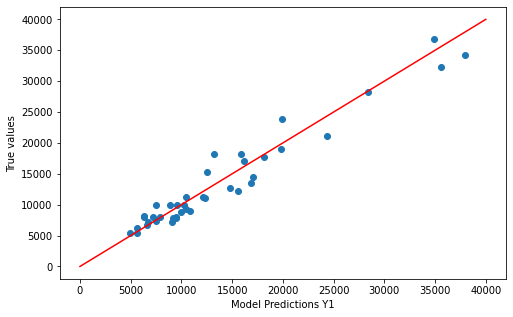

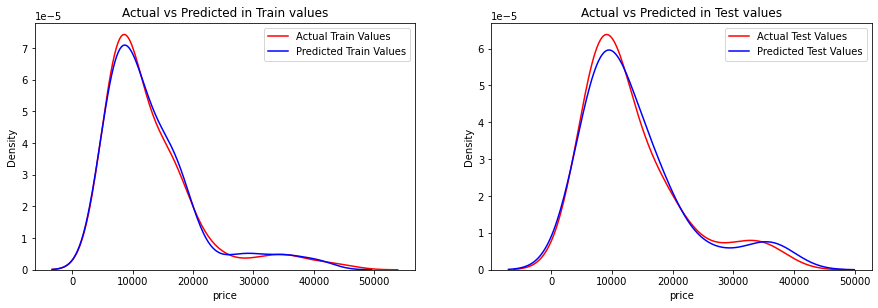

In [60]:
model_check_visualization(y_train, yhat_train1, y_test, yhat_test1)

### Nhận xét: 
Với kết quả R2,MSE,MAE có thể nói rằng:
- ~94% variation của price được giải thích bằng model này
- => Model_1 phù hợp với dữ liệu

Từ các biểu đồ cho thấy:
- Hình 1: Các điểm dữ liệu phân bố gần đường line => có một mối quan hệ gần giữa thực tế và dự đoán
- Hình 2 và 3:
    + Từ 2 hình trên có thể thấy rằng sự phân phối dữ liệu dự đoán khá fit dữ liệu thực tế
    + Phần bên trái gần như fit hoàn toàn tuy nhiên phần đỉnh và bên phải còn chênh lệch

### Model_2: [Cleaned_data] - Linear 

In [61]:
model_name2 = '[Cleaned_data] - Linear'
my_steps2 = [('model', LinearRegression())]

In [62]:
yhat_train2, yhat_test2, result2 = build_model(model_name2, my_steps2, X_train, y_train, X_test, y_test)

In [63]:
result2

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Cleaned_data] - Linear,0.948412,0.933821,3.144900e+06,4.155970e+06,1223.265722,1615.2633


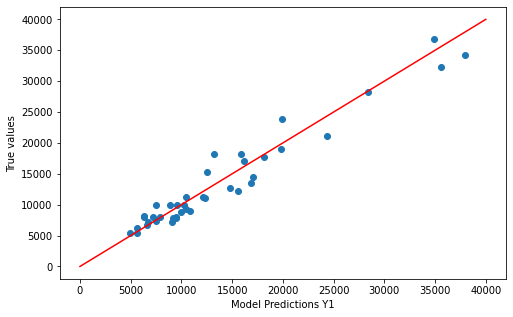

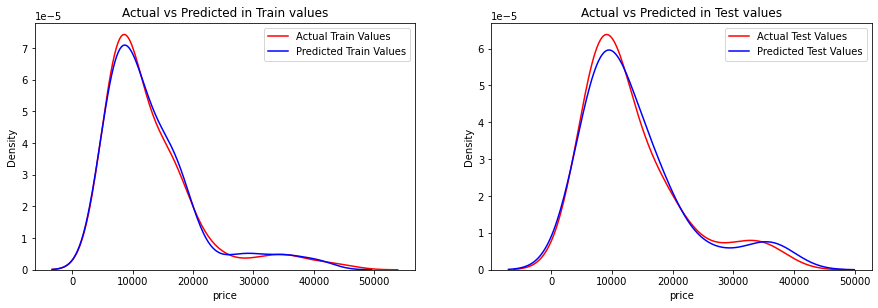

In [64]:
model_check_visualization(y_train, yhat_train2, y_test, yhat_test2)

### Nhận xét: 
- Model không áp dụng RobustScaler cho kết quả giống với Model có áp dụng RobustScaler 
- => RobustScaler không có tác dụng với dataset này

### Model_3: [Original_data] - Linear 

In [65]:
df_new2 = df.copy()

In [66]:
df_new2['n_cyl_encode'] = [n_cyl_dict[i] for i in df_new2['num_of_cylinders']]

In [67]:
df_new2['n_cyl_encode'].unique() 

array([ 4,  6,  5,  3, 12,  2,  8])

In [68]:
df_new2['num_of_doors'] = df_new2['num_of_doors'].apply(lambda x: 2 if x=='two' else 4)

In [69]:
df_new2['num_of_doors'].unique() 

array([2, 4])

In [70]:
df_new2 = df_new2.drop('num_of_cylinders',axis=1)
df_new2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,n_cyl_encode
0,3,113.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4
1,1,113.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6
2,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4
3,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5
4,2,113.0,audi,gas,std,2,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,5


In [71]:
df_new2 = pd.get_dummies(data = df_new2, 
                         columns=['symboling','make','fuel_type','aspiration','num_of_doors','body_style',
                                  'drive_wheels','engine_location','engine_type','n_cyl_encode','fuel_system'],
                         prefix='d', drop_first=True)
df_new2.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,d_6,d_8,d_12,d_2bbl,d_4bbl,d_idi,d_mfi,d_mpfi,d_spdi,d_spfi
0,113.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,113.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
4,113.0,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,...,0,0,0,0,0,0,0,1,0,0


In [72]:
#df_new2.info()

In [73]:
X_o = df_new2.drop('price',axis=1)
y_o = df_new2['price']

In [74]:
# tách dữ liệu thành train và test
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, train_size=0.8, random_state=0)
X_train_o.shape, X_test_o.shape

((158, 69), (40, 69))

In [75]:
model_name3 = '[Original_data] - Linear'
my_steps3 = [('model', LinearRegression())]

In [76]:
yhat_train3, yhat_test3, result3 = build_model(model_name3,my_steps3,X_train_o,y_train_o,X_test_o,y_test_o)

In [77]:
result3

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Original_data] - Linear,0.955824,0.946072,2.693092e+06,3.386600e+06,1157.466979,1406.648764


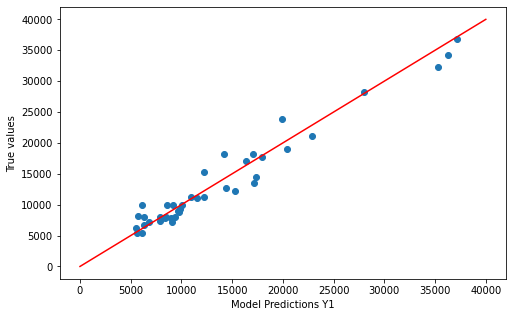

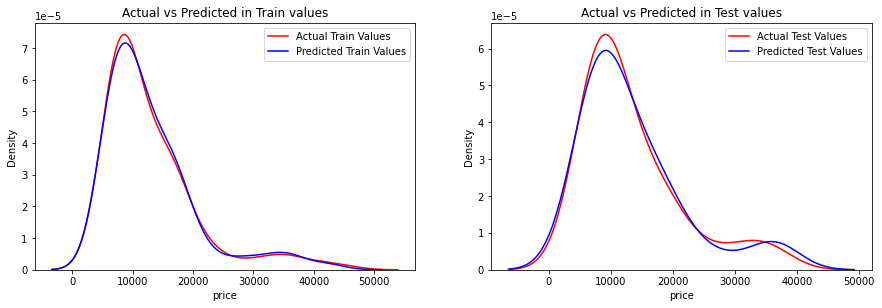

In [78]:
model_check_visualization(y_train_o, yhat_train3, y_test_o, yhat_test3)

### Nhận xét:
- Model build trên dữ liệu gốc (đã xử lý missing value) cho hiệu suất cao hơn và sai số ít hơn Model 1 và 2

In [79]:
df_result = pd.concat([result1, result2, result3],axis=0)

In [80]:
df_result

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Cleaned_data] - Linear & RobustScaler,0.948412,0.933821,3.144900e+06,4.155970e+06,1223.265722,1615.263300
[Cleaned_data] - Linear,0.948412,0.933821,3.144900e+06,4.155970e+06,1223.265722,1615.263300
[Original_data] - Linear,0.955824,0.946072,2.693092e+06,3.386600e+06,1157.466979,1406.648764


### Kết luận:
- Chọn Model build trên dữ liệu gốc (đã xử lý mising values) với thuật toán Linear Regression
- vì có R^2 train và test cao nhất, sai số trung bình nhỏ nhất